<a href="https://colab.research.google.com/github/Vixuz144/Simulacion2/blob/main/Laberinto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from random import random
import tkinter as TK

def ventana(L, INICIO, FINAL, d_max, delay):
  tiempo = 0
  def inicio():
    i = TK.Label(v, bg='red')
    f = TK.Label(v, bg='green')
    i.grid(row=INICIO[0], column=INICIO[1])
    f.grid(row=FINAL[0], column=FINAL[1], sticky='wens')

  def actualizacion():
    for i in trayectoria:
      c = TK.Label(v, bg='deepskyblue')
      c.grid(row=i[0], column=i[1], sticky='wens')
    p = TK.Label(v, bg='red')
    p.grid(row=i[0], column=i[1])

  n, m = np.shape(L)
  v = TK.Tk()
  v.geometry('720x600')
  for i in range(m):
    v.columnconfigure(i, weight=1)
  for i in range(n):
    v.rowconfigure(i, weight=1)
    for j in range(m):

      if L[i,j] == '0':
        c = TK.Label(v, bg='black')
      elif L[i,j] == '.':
        c = TK.Label(v, bg='cyan')
      c.grid(row=i, column=j, sticky='wens')
  l = np.array(L.tolist())


  y, x = INICIO
  pos = (y,x)
  l[pos] = 'X'
  print(pos)

  a, b = FINAL
  L[a,b] = 'V'
  tiempo +=5000
  v.after(tiempo, inicio)

  li, ls = 0, 22
  pasos = 0
  trayectoria = [pos]
  while pasos < d_max:
    r = random()
    pasos += 1
    if r < 0.25:
      y -=1
    elif r <0.50:
      x += 1
    elif r < 0.75:
      y += 1
    else:
      x -= 1

    pos_a  = pos
    cond1 = li <= x <= ls and li <= y <= ls
    cond2 = l[y,x] == '.' or l[y,x] == 'V'
    if cond1 and cond2:
      pos = (y,x)
      l[pos_a] = '-'
      l[pos] = 'X'

      trayectoria.append(pos)
      if l[pos] == 'V':
        break
    else:
      y, x = pos_a

  tiempo += delay * 1000
  v.after(tiempo, actualizacion)
  v.mainloop()

def recorido(L, INICIO, FINAL, d_max):
  l = np.array(L.tolist())
  y, x = INICIO
  pos = (y,x)
  l[pos] = 'X'

  a, b = FINAL
  L[a,b] = 'V'

  li, ls = 0, 22
  pasos = 0
  trayectoria = [pos]
  while pasos < d_max:
    r = random()
    pasos += 1
    if r < 0.25:
      y -=1
    elif r <0.50:
      x += 1
    elif r < 0.75:
      y += 1
    else:
      x -= 1

    pos_a  = pos
    cond1 = li <= x <= ls and li <= y <= ls
    if cond1:
      cond2 = l[y,x] == '.' or l[y,x] == 'V'
    else:
      cond2 = False
    if cond1 and cond2:
      pos = (y,x)
      l[pos_a] = '-'
      l[pos] = 'X'
      trayectoria.append(pos)
      if l[pos] == 'V':
        break
    else:
      y, x = pos_a
  return trayectoria

def ventana_resultados(L, resultados):
  n, m = np.shape(L)
  v = TK.Tk()
  v.geometry('720x600')
  for i in range(m):
    v.columnconfigure(i, weight=1)
  for i in range(n):
    v.rowconfigure(i, weight=1)
    for j in range(m):

      if L[i,j] == '0':
        c = TK.Label(v, bg='black')
      elif L[i,j] == '.':
        c = TK.Label(v, bg='cyan')
      c.grid(row=i, column=j, sticky='wens')

  for i in resultados:
    c = TK.Label(v, bg='red')
    c.grid(row=i[0], column=i[1])
  v.mainloop()


if __name__ == '__main__':
  LABERINTO = '''00000000000000000000000
  0...0.0...0.......0....
  000.0.0.0.0.00000.0.000
  0.0...0.0...0...0...0.0
  0.0.000.0000000.00000.0
  0.0...0.........0...0.0
  0.000.000.000.0.0.000.0
  0.....0.0.0.0.0...0...0
  000.0.0.000.000.000.0.0
  0...0...0...0.....0.0.0
  0.000000000.0.000.0.000
  0.....0.......0.....0.0
  0.0.0.000000000.000.0.0
  0.0.0.0...0.......0...0
  000.0.000.0.00000.000.0
  0...0.....0...0.0.0.0.0
  0.000.0.000.000.000.0.0
  0...0.0.....0...0.0...0
  0.0.0.0000000.000.000.0
  0.0.0.0.....0...0...0.0
  000.000.000.000.0.0.000
  ........0.........0...0
  00000000000000000000000'''

  l = LABERINTO.rsplit('\n')
  n = len(l)
  m = len(l[0])

  L = np.zeros((n,m)).tolist()
  for i in range(n):
    for j in range(m):
      L[i][j] = l[i][j]
  L = np.array(L)

  INICIO = (21, 0)
  FINAL = (1, 22)
  d_max = 1000
  delay = 2

  # ventana(L, INICIO, FINAL, d_max, delay)

  nr = 1000
  lista = []
  for i in range(nr):
    tray = recorido(L, INICIO, FINAL, d_max)
    lista.append(tray[-1])

  resultados = list(set(lista))

  print(resultados)

  ventana_resultados(L, resultados)

[(21, 0)]


TclError: no display name and no $DISPLAY environment variable

0.002


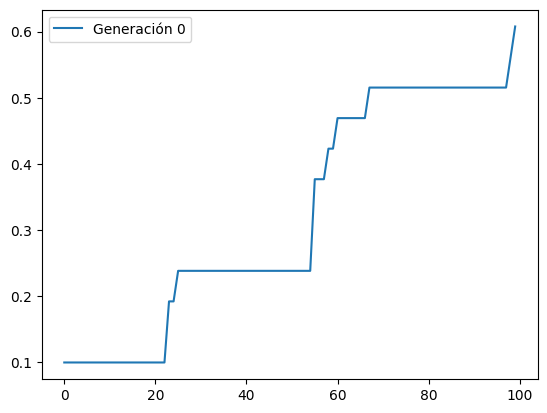

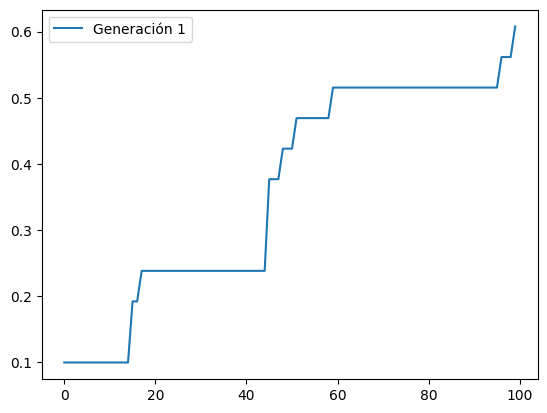

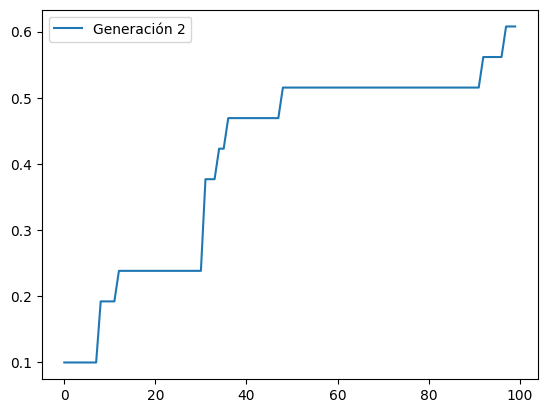

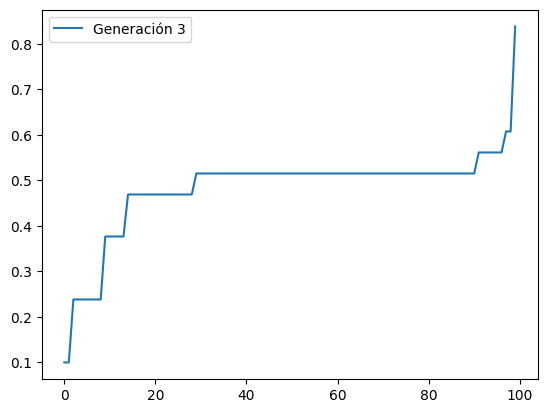

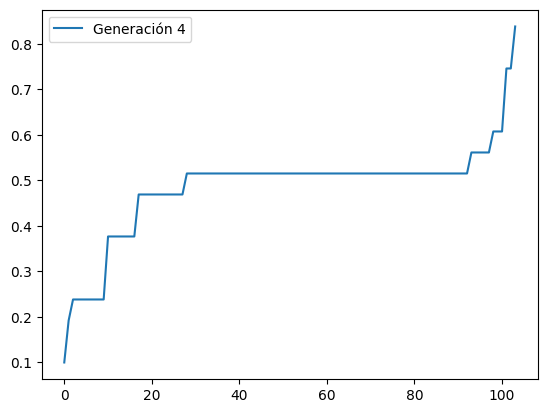

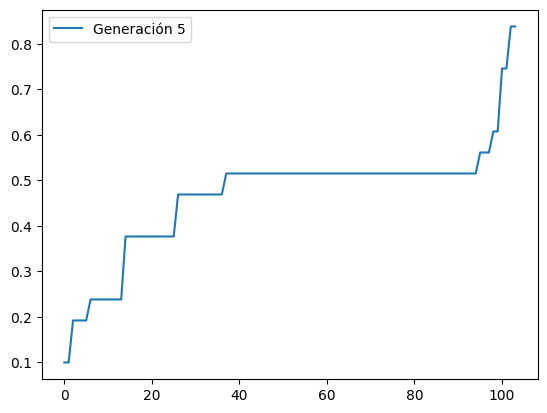

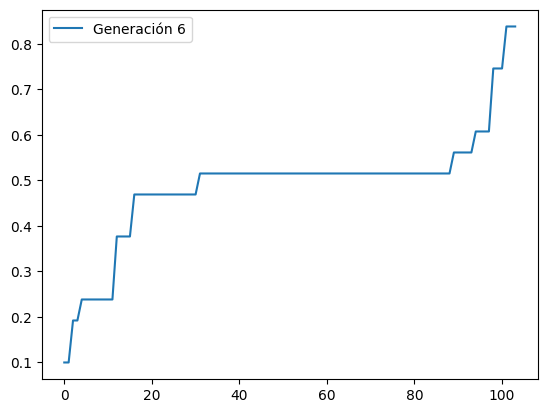

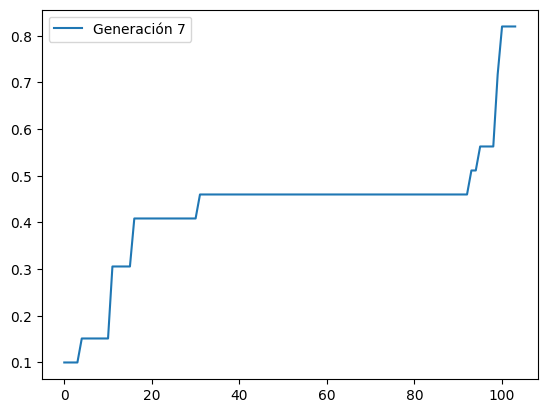

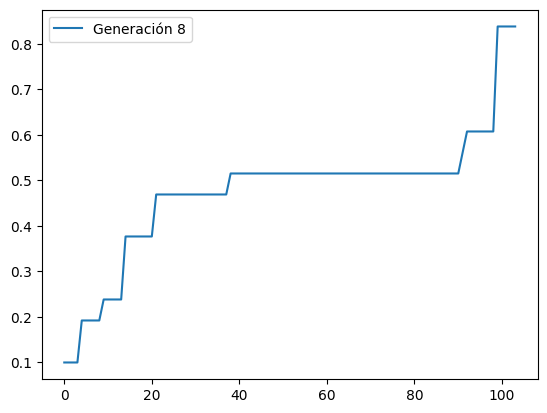

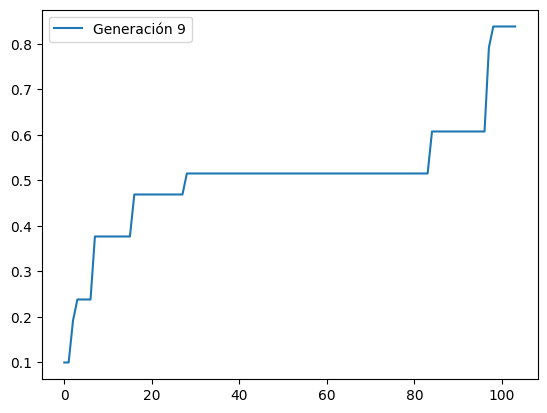

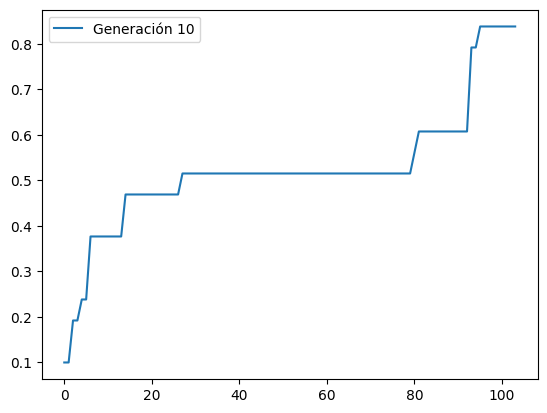

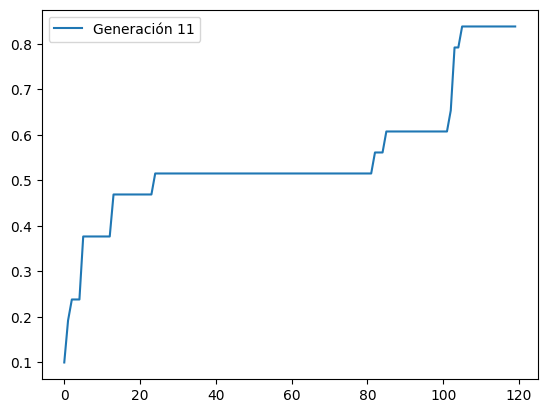

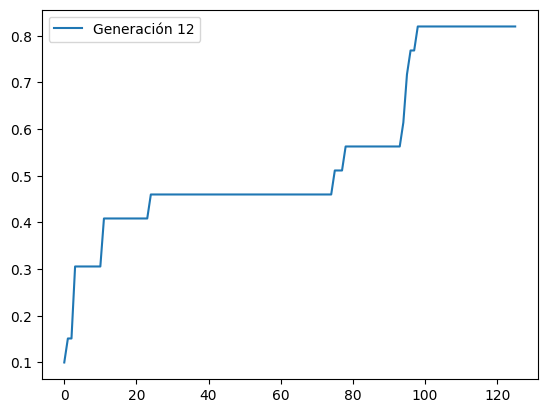

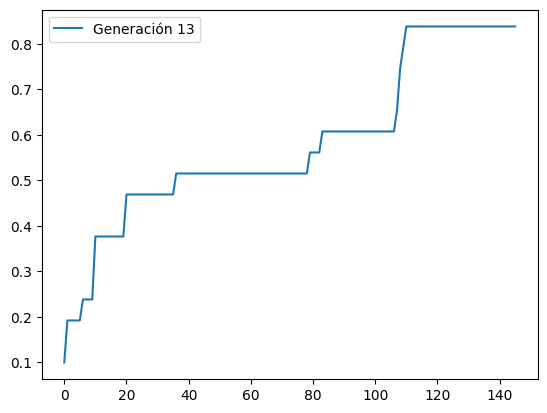

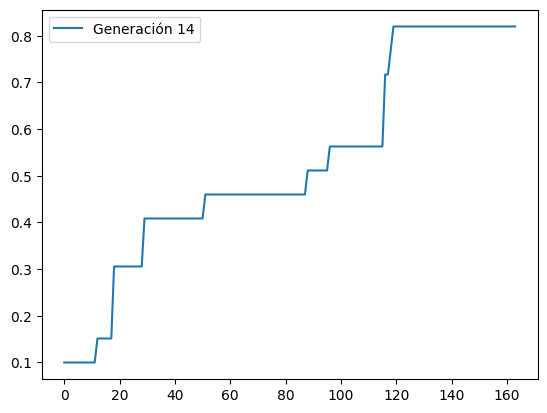

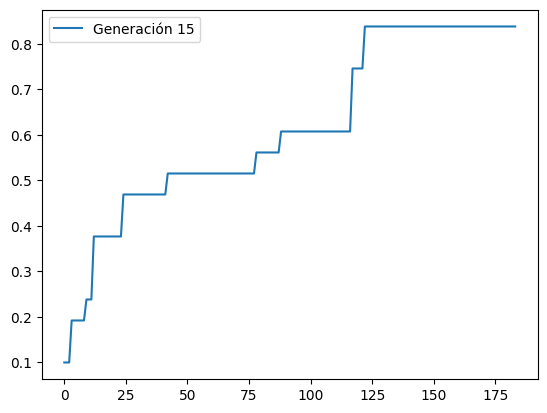

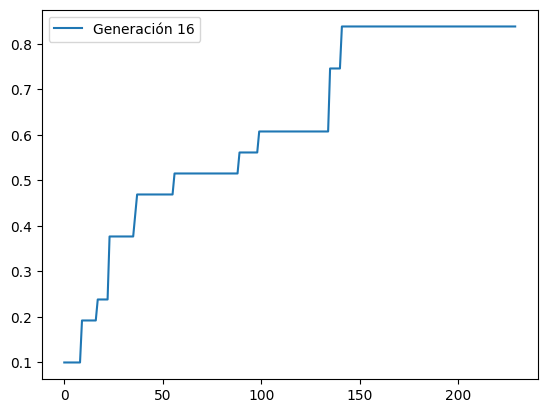

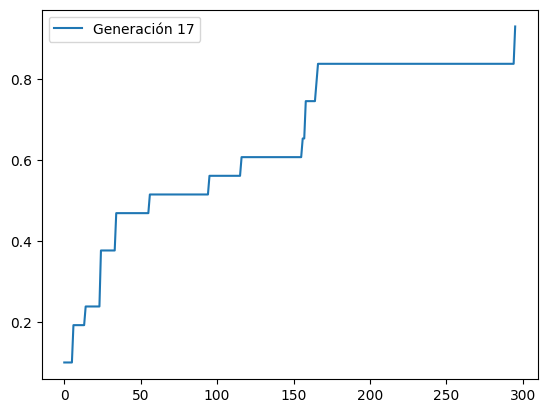

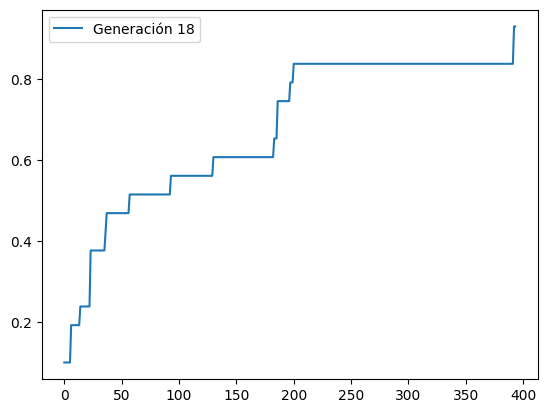

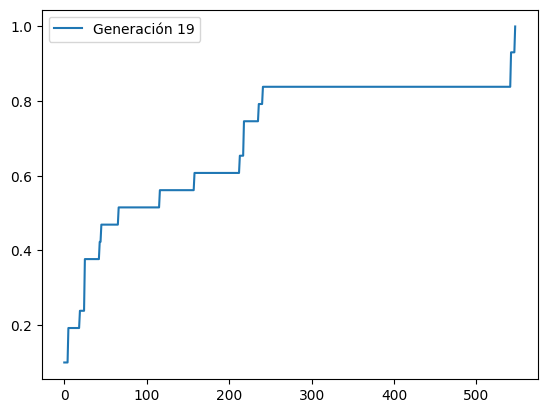

[0.6076923076923076, 0.6076923076923076, 0.6076923076923076, 0.8384615384615385, 0.8384615384615385, 0.8384615384615385, 0.8384615384615385, 0.8200000000000001, 0.8384615384615385, 0.8384615384615385, 0.8384615384615385, 0.8384615384615385, 0.8200000000000001, 0.8384615384615385, 0.8200000000000001, 0.8384615384615385, 0.8384615384615385, 0.9307692307692308, 0.9307692307692308, 1.0]


In [2]:
import numpy as np
from random import random, randint
import matplotlib.pyplot as plt

def pob0(L, INICIO, FINAL, d_max, nr):
  ind = []
  for i in range(nr):
    l = np.array(L.tolist())
    y, x = INICIO
    pos = (y,x)
    l[pos] = 'X'

    a, b = FINAL
    L[a,b] = 'V'

    li, ls = 0, 22
    pasos = 0
    trayectoria = ''
    while pasos < d_max:
        r = random()
        pasos += 1
        if r < 0.25:
            y -=1
            d = '00'
        elif r <0.50:
            x += 1
            d = '01'
        elif r < 0.75:
            y += 1
            d = '10'
        else:
            x -= 1
            d = '11'

        trayectoria += d
        pos_a  = pos
        cond1 = li <= x <= ls and li <= y <= ls
        if cond1:
            cond2 = l[y,x] == '.' or l[y,x] == 'V'
        else:
          cond2 = False
        if cond1 and cond2:
            pos = (y,x)
            l[pos_a] = '-'
            l[pos] = 'X'
            if l[pos] == 'V':
                break
        else:
          y, x = pos_a
    ind.append(trayectoria)
  return ind

def func(direcciones, L, INICIO, FINAL):
    l = np.array(L.tolist())
    y, x = INICIO
    pos = (y,x)
    l[pos] = 'X'

    a, b = FINAL
    L[a,b] = 'V'

    li, ls = 0, 22
    pasos = 0

    n = len(direcciones)//2
    trayectoria = []
    for i in range(n):
        d = direcciones[i*2: (i+1)*2]
        if d == '00':
            y -=1
        elif d == '01':
            x += 1
        elif d == '10':
            y += 1
        elif d == '11':
            x -= 1

        pos_a  = pos
        cond1 = li <= x <= ls and li <= y <= ls
        if cond1:
            cond2 = l[y,x] == '.' or l[y,x] == 'V'
        else:
            cond2 = False
        if cond1 and cond2:
            pos = (y,x)
            l[pos_a] = '-'
            l[pos] = 'X'
            if l[pos] == 'V':
                break
        else:
          y, x = pos_a
    distancia_final = sum(abs(np.array(FINAL) - np.array(pos)))
    score = distancia_final
    return score

def seleccion(pob, func, L, INICIO, FINAL):
    scores = []
    for i in pob:
        scores.append(func(i, L, INICIO, FINAL))
    aptitud = -np.array(scores)/max(scores) * 9/10 + 1
    return aptitud

def cruza(pob, aptitud):
    candidatos = []
    for i in range(len(pob)):
        r = random()
        if r <= aptitud[i]:
            candidatos.append(pob[i])

    n = len(candidatos)
    orden = np.argsort(np.random.random(n))
    nva_pob = []
    for i in range(n):
        madre = candidatos[i]
        padre = candidatos[orden[i]]
        m = min(len(madre),len(padre))
        r = randint(0,m-1)
        hijo1 = madre[:r] + padre[r:]
        hijo2 = padre[:r] + madre[r:]
        nva_pob.append(hijo1)
        nva_pob.append(hijo2)
    if len(nva_pob) < len(pob):
        n = len(pob) - len(nva_pob)
        nva_pob.append(pob[np.argmax(aptitud)])
        for i in range(n-1):
            nva_pob.append(pob[i])
    return nva_pob

def mutacion_individuo(ind, pm):
    n = len(ind)
    nvo_ind = ''
    for i in range(n):
        r = random()
        if r <= pm:
            nvo_ind += str(int(not bool(ind[i])))
        else:
            nvo_ind += ind[i]
    return nvo_ind

def mutacion_poblacional(pob, pm):
    pob_mut = []
    for i in pob:
        pob_mut.append(mutacion_individuo(i, pm))
    return pob_mut

def alg_gen(pob0, func, pm, no_gen, cond):
    L, INICIO, FINAL = cond
    mcg = []
    apt = []
    pob = pob0
    for i in range(no_gen):
        aptitud = seleccion(pob, func, L, INICIO, FINAL)
        graf = np.sort(aptitud)
        plt.plot(graf, label = f'Generación {i}', color='orange')
        plt.legend()
        plt.show()
        o = np.argsort(aptitud)
        mcg.append(pob[o[-1]])
        apt.append(aptitud[o[-1]])
        nva_pob = cruza(pob,aptitud)
        pob = mutacion_poblacional(nva_pob, pm)
    # plt.legend()
    # plt.show()
    return mcg, apt


def recorido(direcciones, L, INICIO, FINAL):
    l = np.array(L.tolist())
    y, x = INICIO
    pos = (y,x)
    l[pos] = 'X'

    a, b = FINAL
    L[a,b] = 'V'

    li, ls = 0, 22
    pasos = 0

    n = len(direcciones)//2
    trayectoria = []
    for i in range(n):
        d = direcciones[i*2: (i+1)*2]
        if d == '00':
            y -=1
        elif d == '01':
            x += 1
        elif d == '10':
            y += 1
        elif d == '11':
            x -= 1

        pos_a  = pos
        cond1 = li <= x <= ls and li <= y <= ls
        if cond1:
            cond2 = l[y,x] == '.' or l[y,x] == 'V'
        else:
          cond2 = False
        if cond1 and cond2:
            pos = (y,x)
            l[pos_a] = '-'
            l[pos] = 'X'
            if l[pos] == 'V':
                break
        else:
          y, x = pos_a
    return pos


LABERINTO = '''00000000000000000000000
0...0.0...0.......0....
000.0.0.0.0.00000.0.000
0.0...0.0...0...0...0.0
0.0.000.0000000.00000.0
0.0...0.........0...0.0
0.000.000.000.0.0.000.0
0.....0.0.0.0.0...0...0
000.0.0.000.000.000.0.0
0...0...0...0.....0.0.0
0.000000000.0.000.0.000
0.....0.......0.....0.0
0.0.0.000000000.000.0.0
0.0.0.0...0.......0...0
000.0.000.0.00000.000.0
0...0.....0...0.0.0.0.0
0.000.0.000.000.000.0.0
0...0.0.....0...0.0...0
0.0.0.0000000.000.000.0
0.0.0.0.....0...0...0.0
000.000.000.000.0.0.000
........0.........0...0
00000000000000000000000'''

l = LABERINTO.rsplit('\n')
n = len(l)
m = len(l[0])

L = np.zeros((n,m)).tolist()
for i in range(n):
    for j in range(m):
        L[i][j] = l[i][j]
L = np.array(L)

INICIO = (21, 0)
FINAL = (1, 22)
pasos = 1000
tamaño = 100

p0 = pob0(L, INICIO, FINAL, pasos, tamaño)

generaciones = 20
pm = 1/tamaño/5
print(pm)
a, b = alg_gen(p0, func, pm, generaciones, (L, INICIO, FINAL))
# print(a)
print(b)


In [ ]:
import numpy as np
from random import randint, random
a = np.array([1, 2])
b = np.array([-1, -2])

print(b-a)
print(sum(abs(b-a)))

a = '111111111111'
b = '000000000000'
p = 7

c = a[:p] + b[p:]
d = b[:p] + a[p:]

print(a, b)
print(c, d)

a = '010101'
print(a)
p = 2
# b = a[:p-1] + str(int(not bool(a[p]))) + a[p:]
b = a[:p-1] + str(not int(a[p])) + a[p:]
print(b)

[-2 -4]
6
111111111111 000000000000
111111100000 000000011111
010101
0True0101
